<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **DBSCAN**


Estimated time needed: **30** minutes


Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering.

## Use cases of DBSCAN:

- **Recommender systems** that make recommendations to users based on preferences (such as Netflix viewing patterns) of similar users (such as neighbors).
- **Anomaly detection** that identifies rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behavior.
- **Customer segmentation** that aims at separating customers into multiple clusters, and devise targeted marketing strategy based on each cluster's characteristics.


## When is DBSCAN better than K-Means?


You are a Data Scientist working for a retail company, and the marketing team wants you to use Data Science techniques to divide the company's customer base into groups of individuals that are similar in specific aspects such as age, gender, and spending behavior, so that they could devise targeted marketing strategy for each group based on its average spending on various product categories.

In this case, since you don't know what would be the optimal number of groups/clusters to look for in the customer base, you can't use K-Means as it requires you to specify the number of clusters.

Besides, since the marketing team wants to understand the average spendings of each group in order to devise its corresponding promotion, we should use an algorithm that's more robust to outliers.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/marketing.jpg" style="width: 70%">

Image from [PxHere](https://pxhere.com/en/photo/1448601?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)


In this notebook, we will look at a clustering technique using DBSCAN, which help us overcome the two aforementioned shortcomings of the K-Means clustering. Also, we will be able to look at the handwriting example to prove whether someones handwriting is bad, using DBSCAN.


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Background">Background</a>
        <ol>
            <li><a href="#How-does-DBSCAN-work?">How does DBSCAN work?</a></li>
        </ol>
    </li>
    <li><a href="#Visual-Example">Example 1: Visual Example</a></li>
    <li><a href="#Proving-Your-Friend-Has-Bad-Handwriting">Example 2: Proving your friend has bad handwriting</a></li>
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---Find-the-number-of-clusters">Exercise 1 - Find the number of clusters</a></li>
    <li><a href="#Exercise-2---Find-the-%-of-data-marked-as-noise">Exercise 2 - Find the % of data marked as noise</a></li>
    <li><a href="#Exercise-3---Visualize-the-clustered-data-using-matplotlib.pyplot">Exercise 3 - Visualize the clustered data using matplotlib.pyplot</a></li>
</ol>


----


## Objectives


After completing this lab you will be able to:


* __Explain__ what DBSCAN does and how it works.
* __Understand__ the strengths, weaknesses, and use cases of DBSCAN.


## Setup


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for mathematical operations.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for visualizing the data.
 - [`scipy`](https://docs.scipy.org/doc/scipy/reference/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for complex numerical operations.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [26]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ..."
# Tất cả các thư viện cần thiết cho bài lab này được liệt kê bên dưới. Các thư viện được cài đặt sẵn trên Skills Network Labs đã được chú thích.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3
# Lưu ý: Nếu môi trường của bạn không hỗ trợ "!mamba install", hãy sử dụng "!pip install pandas==1.3.4 ..."

### Importing Required Libraries


In [30]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

# Loại bỏ bất kỳ cảnh báo nào:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

import pandas as pd # Import thư viện pandas để làm việc với dữ liệu dạng bảng
import numpy as np # Import thư viện numpy để làm việc với các phép toán số học và mảng
from sklearn.cluster import DBSCAN # Import thuật toán DBSCAN từ scikit-learn để phân cụm
from sklearn.manifold import TSNE # Import thuật toán TSNE từ scikit-learn để giảm chiều dữ liệu
from sklearn.datasets import load_digits # Import hàm load_digits từ scikit-learn để tải bộ dữ liệu chữ số viết tay

import seaborn as sns # Import thư viện seaborn để tạo biểu đồ đẹp hơn

sns.set_context('notebook') # Thiết lập ngữ cảnh biểu đồ cho notebook
sns.set_style('white') # Thiết lập kiểu biểu đồ là nền trắng

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt # Import thư viện matplotlib để vẽ biểu đồ

# Make matplotlib work in jupyter notebook
%matplotlib inline

## Background

__DBSCAN__ is a clustering algorithm that stands for:

"**D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise"

 - _Density-Based_ - DBSCAN will group points that are densely-packed together
 - _Spacial-Clustering_ - DBSCAN is for numerical points $\in \mathbb{R}^n$
 - _Applications with Noise_ - DBSCAN is great for applications that have noise
   - This is because DBSCAN also finds outliers/noise in data


### How does DBSCAN work?

__DBSCAN__ uses two parameters:
 - `eps` (aka epsilon - $\epsilon$) - the max distance between two points for them to be considered "in the same neighborhood"
 - `min_samples` - the minimum number of neighbors a point needs to be considered a __core point__.

If a point is a neighbor of a __core point__, then it's in the same cluster as that point.

Otherwise, it's considered to be __noise__.


#### Additional Resources

You're encouraged to take a look at the [Pseudocode for DBSCAN](https://www.researchgate.net/figure/Pseudocode-of-the-DBSCAN-algorithm_fig2_325059373?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) if a more in-depth understanding is desired.

[The original DBSCAN paper ](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) hosted by [aaai.org](https://www.aaai.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01).


## Visual Example

Let's begin with a visual example that demonstrates how DBSCAN works.

Load the dataset `grid.csv` into a DataFrame:


In [31]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/example1.csv') # Đọc dữ liệu từ file CSV vào DataFrame
df.head(n=6) # Hiển thị 6 dòng đầu tiên của DataFrame

,0,1
0,-3,0
1,0,-3
2,0,0
3,0,3
4,3,0
5,6,0


We can see the dataset is a small handful of points $3$ units apart:


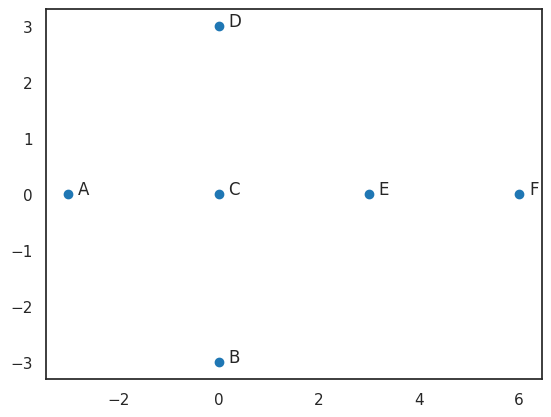

In [32]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize'] # Đặt lại kích thước biểu đồ về mặc định
plt.scatter(df['0'], df['1']) # Vẽ biểu đồ scatter của cột '0' và '1'
for t, p in zip(string.ascii_uppercase, df.iterrows()): # Lặp qua các chữ cái và các hàng của DataFrame
    plt.annotate(t, (p[1][0] + 0.2, p[1][1])) # Ghi chú chữ cái lên điểm tương ứng trên biểu đồ
plt.show() # Hiển thị biểu đồ

We apply the DBSCAN algorithm with:

 - `eps=3`
 - `min_samples=4`

Lets think about what should happen:
  - The point $C$ is the only point that has `min_samples=4` or more points within a distance of `eps=3`.
    - This makes $C$ the only __core__ point in the dataset.
  - Points $A$, $B$, $D$, and $E$ are within `eps=3` units from $C$.
    - This means $A$, $B$, $D$, and $E$ will be in the same cluster as $C$.
  - Finally, point $F$ is __not__ within `eps=3` units of a core point
    - $F$ will be labeled as **noise**.


In [33]:
cluster = DBSCAN(eps=3, min_samples=4) # Khởi tạo đối tượng DBSCAN với eps=3 và min_samples=4
cluster.fit(df) # Áp dụng thuật toán DBSCAN lên dữ liệu
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.') # In ra số lượng cluster tìm được và số điểm nhiễu

DBSCAN found 1 clusters and 1 points of noise.


Let's visualize how DBSCAN clustered our dataset:


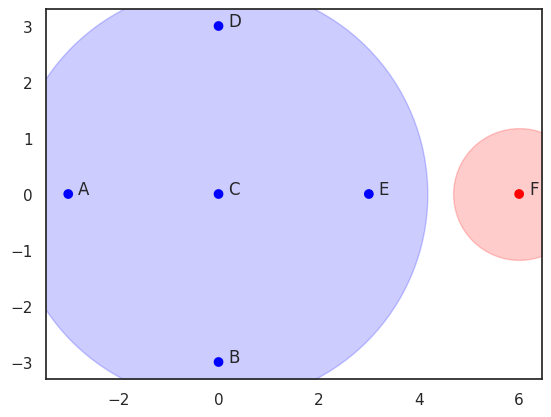

In [34]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize'] # Đặt lại kích thước biểu đồ về mặc định
plt.scatter(df['0'], df['1'], c=[['blue', 'red'][l] for l in cluster.labels_]) # Vẽ biểu đồ scatter, màu sắc dựa trên nhãn cluster (xanh cho cluster, đỏ cho nhiễu)
plt.scatter(0, 0, c='blue', alpha=0.2, s=90000) # Vẽ vòng tròn màu xanh nhạt tại điểm (0,0) để minh họa vùng eps=3
plt.scatter(6, 0, c='red', alpha=0.2, s=9000) # Vẽ vòng tròn màu đỏ nhạt tại điểm (6,0) để minh họa vùng eps=3
for t, p in zip(string.ascii_uppercase, df.iterrows()): # Lặp qua các chữ cái và các hàng của DataFrame
    plt.annotate(t, (p[1][0] + 0.2, p[1][1])) # Ghi chú chữ cái lên điểm tương ứng trên biểu đồ
plt.show() # Hiển thị biểu đồ

As expected, DBSCAN found one cluster (blue) and one point of noise (red).


## Proving Someone Has Bad Handwriting

Let's say your friend has aweful handwriting.
You (as a good friend) want to help out, but:
 - _They will only work on their handwriting if you can prove their handwriting is bad._

One way to do this is to cluster readable handwriting from other people using DBSCAN.

The idea is: If your friend struggles to properly write a specific character, it will either:
 1. Be marked as noise by `DBSCAN`.
 2. Be grouped with a different kind of character
    - For example, if your friend wrote a "5" but it's grouped with "4"s, then it's probably not a very well-written 5.

Our pipeline will be as follows:
 1. Load and Scale the data.
 2. Apply `TSNE` algorithm.
    - To overly simplify, `TSNE` reduces the dimension of data such that similar data is closer together.
 3. Apply `DBSCAN` algorithm.
 4. Visualize our categorized data and show how dissimilar our friend's handwriting is.


First, we handwritten data we gathered from our friend's math assignment:


In [35]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/012.csv') # Đọc dữ liệu chữ viết tay từ file CSV
df.head() # Hiển thị 5 dòng đầu tiên của DataFrame

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0,0,0,0,16,13,14,14,0,0,...,0,0,0,11,15,14,14,0,0,0
1,0,16,10,0,0,0,0,0,0,0,...,14,0,0,0,0,-1,2,13,7,1
2,0,12,14,6,5,3,0,0,0,16,...,0,0,10,11,0,0,2,14,8,2


Let's visualize our data using `matplotlib`,

We will need to reshape the data into 8x8 images, so matplotlib can properly display it:


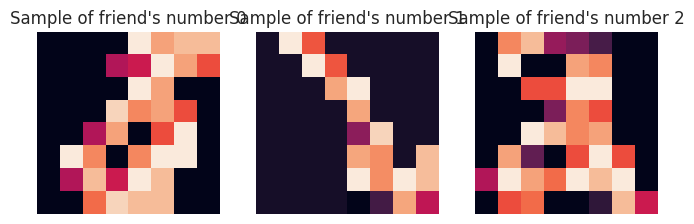

In [36]:
friend_digits = df.iloc[:, df.columns != 'y'].to_numpy() # Lấy dữ liệu chữ số của bạn bè (không bao gồm cột nhãn 'y') và chuyển sang mảng NumPy
plt.rcParams['figure.figsize'] = (8,6) # Đặt kích thước biểu đồ
it = (x.reshape(8, 8) for x in friend_digits) # Tạo iterator để reshape mỗi hàng dữ liệu thành ảnh 8x8
c = 3 # Số lượng ảnh muốn hiển thị
fig, ax = plt.subplots(1, c, sharex='col', sharey='row') # Tạo figure và axes để hiển thị ảnh
for j in range(c): # Lặp qua số lượng ảnh muốn hiển thị
    ax[j].axis('off') # Tắt trục tọa độ
    ax[j].set_title(f'Sample of friend\'s number {j}') # Đặt tiêu đề cho mỗi ảnh
    ax[j].imshow(next(it)) # Hiển thị ảnh
plt.show() # Hiển thị biểu đồ
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize'] # Đặt lại kích thước biểu đồ về mặc định

Next, we import the a dataset of digits from `sklearn` based on the MNIST dataset.
This data contains handwritten numbers from hundreds individuals across the United States:


In [37]:
# Load the data
digits, y = load_digits(return_X_y=True) # Tải bộ dữ liệu chữ số viết tay và nhãn tương ứng
pd.DataFrame(digits).head() # Hiển thị 5 dòng đầu tiên của dữ liệu chữ số dưới dạng DataFrame

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Let's visualize our data using `matplotlib`:


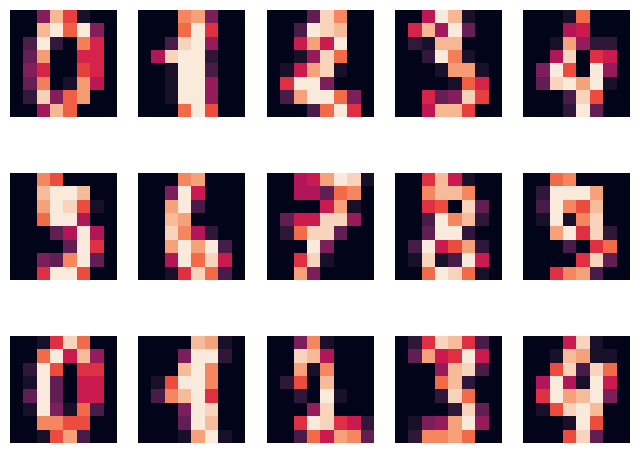

In [38]:
plt.rcParams['figure.figsize'] = (8,6) # Đặt kích thước biểu đồ
it = (x.reshape(8, 8) for x in digits) # Tạo iterator để reshape mỗi hàng dữ liệu thành ảnh 8x8
r, c = 3, 5 # Số hàng và số cột của lưới ảnh
fig, ax = plt.subplots(r, c, sharex='col', sharey='row') # Tạo figure và axes để hiển thị lưới ảnh
for i in range(r): # Lặp qua các hàng
    for j in range(c): # Lặp qua các cột
        ax[i, j].axis('off') # Tắt trục tọa độ
        ax[i, j].imshow(next(it)) # Hiển thị ảnh tiếp theo từ iterator
plt.show() # Hiển thị biểu đồ
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize'] # Đặt lại kích thước biểu đồ về mặc định

Now we create the dataset for our pipeline, containing _both_ MNIST and our friend's digits:


In [39]:
# Use np.r_ to concatenate two rows:
data = np.r_[digits, friend_digits] # Ghép dữ liệu chữ số MNIST và chữ số của bạn bè
y = np.r_[y, df['y']] # Ghép nhãn tương ứng

Next, we initialize the objects for our pipeline, with our chosen hyperparameters:


In [40]:
embedding = TSNE(n_components=2, # Khởi tạo đối tượng TSNE với 2 thành phần
        init="pca", # Sử dụng PCA để khởi tạo
        n_iter=500, # Số lần lặp tối đa
        n_iter_without_progress=150, # Số lần lặp không có sự cải thiện đáng kể để dừng sớm
        perplexity=10, # Tham số liên quan đến số lượng hàng xóm
        random_state=0) # Đặt seed để kết quả có thể lặp lại

In [41]:
e_data = embedding.fit_transform(data) # Áp dụng TSNE để giảm chiều dữ liệu

Our data after applying `TSNE` algorithm:


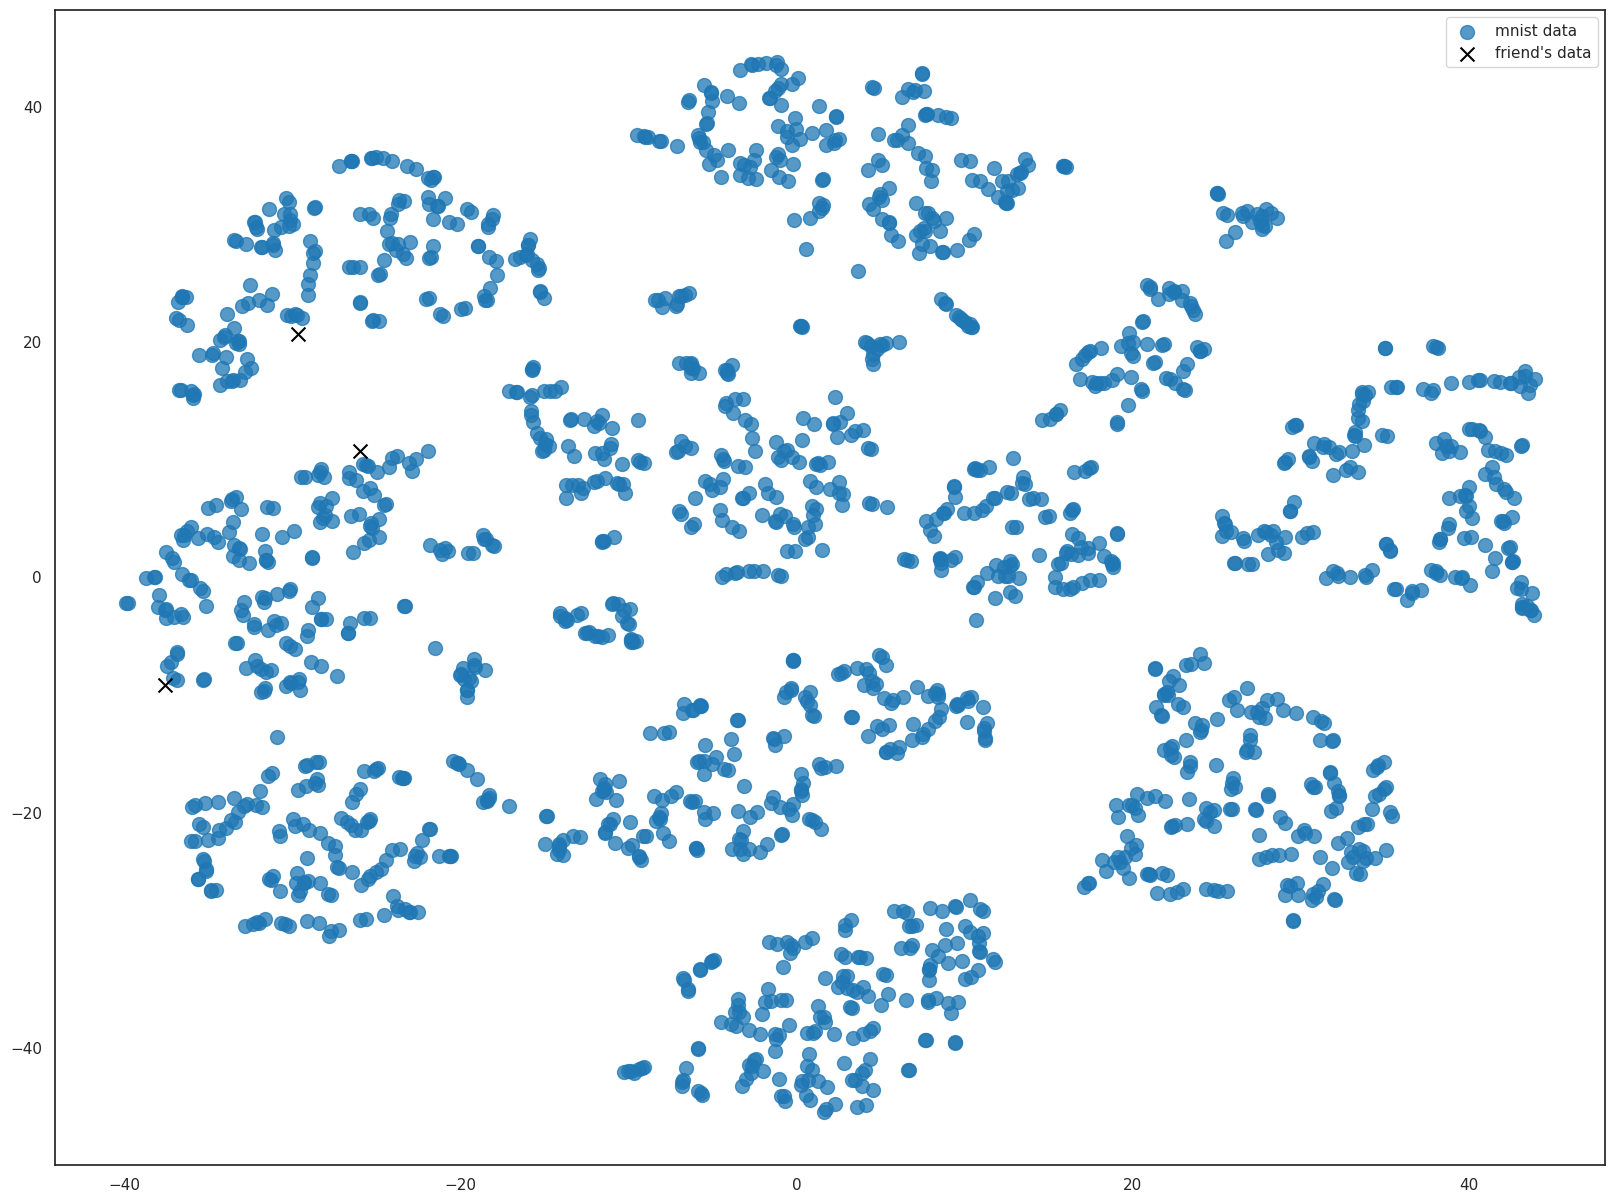

In [42]:
plt.rcParams['figure.figsize'] = (20,15) # Đặt kích thước biểu đồ lớn hơn
n = friend_digits.shape[0] # Lấy số lượng chữ số của bạn bè
plt.scatter(
    e_data[:-n, 0], # Trục x cho dữ liệu MNIST
    e_data[:-n, 1], # Trục y cho dữ liệu MNIST
    marker='o', # Đặt kiểu điểm là hình tròn
    alpha=0.75, # Đặt độ trong suốt
    label='mnist data', # Đặt nhãn cho dữ liệu MNIST
    s=100) # Đặt kích thước điểm
plt.scatter(
    e_data[-n:, 0], # Trục x cho dữ liệu của bạn bè (các điểm cuối cùng)
    e_data[-n:, 1], # Trục y cho dữ liệu của bạn bè
    marker='x', # Đặt kiểu điểm là dấu 'x'
    color='black', # Đặt màu đen
    label='friend\'s data', # Đặt nhãn cho dữ liệu của bạn bè
    alpha=1, # Đặt độ trong suốt
    s=100) # Đặt kích thước điểm
plt.legend(bbox_to_anchor=[1, 1]) # Hiển thị chú giải
plt.show() # Hiển thị biểu đồ
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize'] # Đặt lại kích thước biểu đồ về mặc định

Next, we apply DBSCAN, using our chosen hyperparameters:


In [43]:
cluster = DBSCAN(eps=5, min_samples=20) # Khởi tạo đối tượng DBSCAN với eps=5 và min_samples=20
cluster.fit(e_data) # Áp dụng thuật toán DBSCAN lên dữ liệu đã giảm chiều
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.') # In ra số lượng cluster và số điểm nhiễu

DBSCAN found 9 clusters and 24 points of noise.


Let's visualize our data again, categorized by DBSCAN:


In [55]:
plt.rcParams['figure.figsize'] = (20,15) # Đặt kích thước biểu đồ lớn hơn
unique_labels = set(cluster.labels_) # Lấy danh sách các nhãn cluster duy nhất (bao gồm cả nhiễu -1)
n_labels = len(unique_labels) # Đếm số lượng nhãn duy nhất
# Create a color map, mapping each unique label to a color
label_colors = {label: plt.cm.get_cmap('brg', n_labels)(i) if label >= 0 else 'black' for i, label in enumerate(unique_labels)}
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_'] # Danh sách các kiểu điểm
for i, l in enumerate(unique_labels): # Lặp qua từng nhãn cluster với chỉ số i
    plt.scatter(
        e_data[cluster.labels_ == l, 0], # Trục x cho các điểm thuộc cluster hiện tại
        e_data[cluster.labels_ == l, 1], # Trục y cho các điểm thuộc cluster hiện tại
        c=[label_colors[l]], # Đặt màu cho cluster từ dictionary màu đã tạo
        marker=markers[i % len(markers)], # Đặt kiểu điểm dựa trên chỉ số i
        alpha=0.75, # Đặt độ trong suốt
        s=100, # Đặt kích thước điểm
        label=f'Cluster {l}' if l >= 0 else 'Noise') # Đặt nhãn cho chú giải
plt.legend(bbox_to_anchor=[1, 1]) # Hiển thị chú giải ở vị trí bên phải trên cùng
plt.show() # Hiển thị biểu đồ
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize'] # Đặt lại kích thước biểu đồ về mặc định

IndexError: boolean index did not match indexed array along axis 0; size of axis is 1800 but size of corresponding boolean axis is 3

In [46]:
print("The predicted labels of our friend's handwriting:") # In ra dòng chữ thông báo
print(cluster.labels_[-3:]) # In ra 3 nhãn dự đoán cuối cùng (tương ứng với chữ viết tay của bạn bè)

The predicted labels of our friend's handwriting:
[-1 -1 -1]


Let's see how our pipeline categorized some of the data in its original, handwritten form:


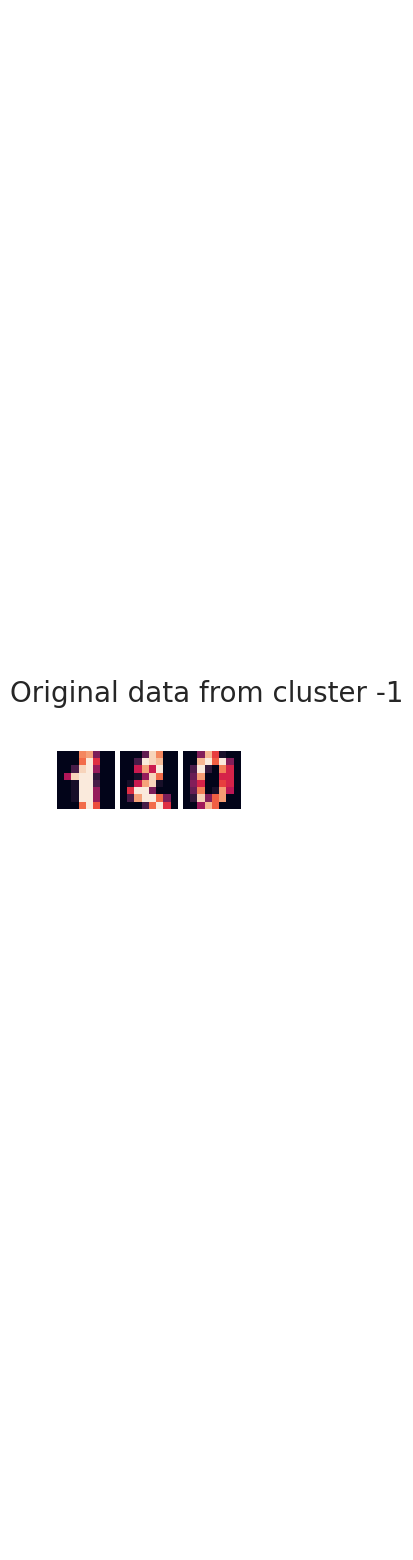

In [54]:
r, c = 1, 5 # Đặt số hàng và số cột cho lưới ảnh hiển thị
plt.rcParams['figure.figsize'] = (4*r,4*c) # Đặt kích thước tổng thể của figure
unique_labels = set(cluster.labels_) # Lấy danh sách các nhãn cluster duy nhất
for label in unique_labels: # Lặp qua từng nhãn cluster
    cluster_data_indices = np.where(cluster.labels_ == label)[0] # Lấy chỉ số của các điểm thuộc cluster hiện tại
    if len(cluster_data_indices) == 0: # Bỏ qua nếu không có điểm nào trong cluster
        continue
    # Lấy dữ liệu gốc bằng cách sử dụng chỉ số
    cluster_data = data[cluster_data_indices]
    # Đảm bảo số lượng mẫu chọn không vượt quá số lượng mẫu có sẵn
    n_samples_to_show = min(r * c, len(cluster_data))
    if n_samples_to_show == 0:
        continue
    nums = cluster_data[np.random.choice(len(cluster_data), n_samples_to_show, replace=False)] # Chọn ngẫu nhiên n_samples_to_show mẫu từ dữ liệu của cluster
    it = (x.reshape(8, 8) for x in nums) # Tạo iterator để reshape mỗi mẫu thành ảnh 8x8
    fig, ax = plt.subplots(r, c) # Tạo figure và axes để hiển thị lưới ảnh
    # Đảm bảo ax có dạng mảng 2D ngay cả khi r=1 hoặc c=1
    if r == 1 and c == 1:
        ax = np.array([[ax]])
    elif r == 1:
        ax = ax.reshape(1, c)
    elif c == 1:
        ax = ax.reshape(r, 1)
    else:
        ax = ax.reshape(r, c)

    plt.subplots_adjust(wspace=0.1, hspace=-0.69) # Điều chỉnh khoảng cách giữa các subplot
    fig.suptitle(f'Original data from cluster {label}', fontsize=20, y=0.545) # Đặt tiêu đề chung cho figure
    for i in range(r): # Lặp qua các hàng của lưới ảnh
        for j in range(c): # Lặp qua các cột của lưới ảnh
            ax[i, j].axis('off') # Tắt trục tọa độ cho từng subplot
            try:
                ax[i, j].imshow(next(it)) # Hiển thị ảnh tiếp theo từ iterator trong subplot hiện tại
            except StopIteration: # Dừng nếu hết ảnh để hiển thị
                pass
plt.show() # Hiển thị biểu đồ
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize'] # Đặt lại kích thước biểu đồ về mặc định

In this case we do have the original labels,

Let's compare `DBSCAN`'s clusters to the actual labels:


Correct labels:


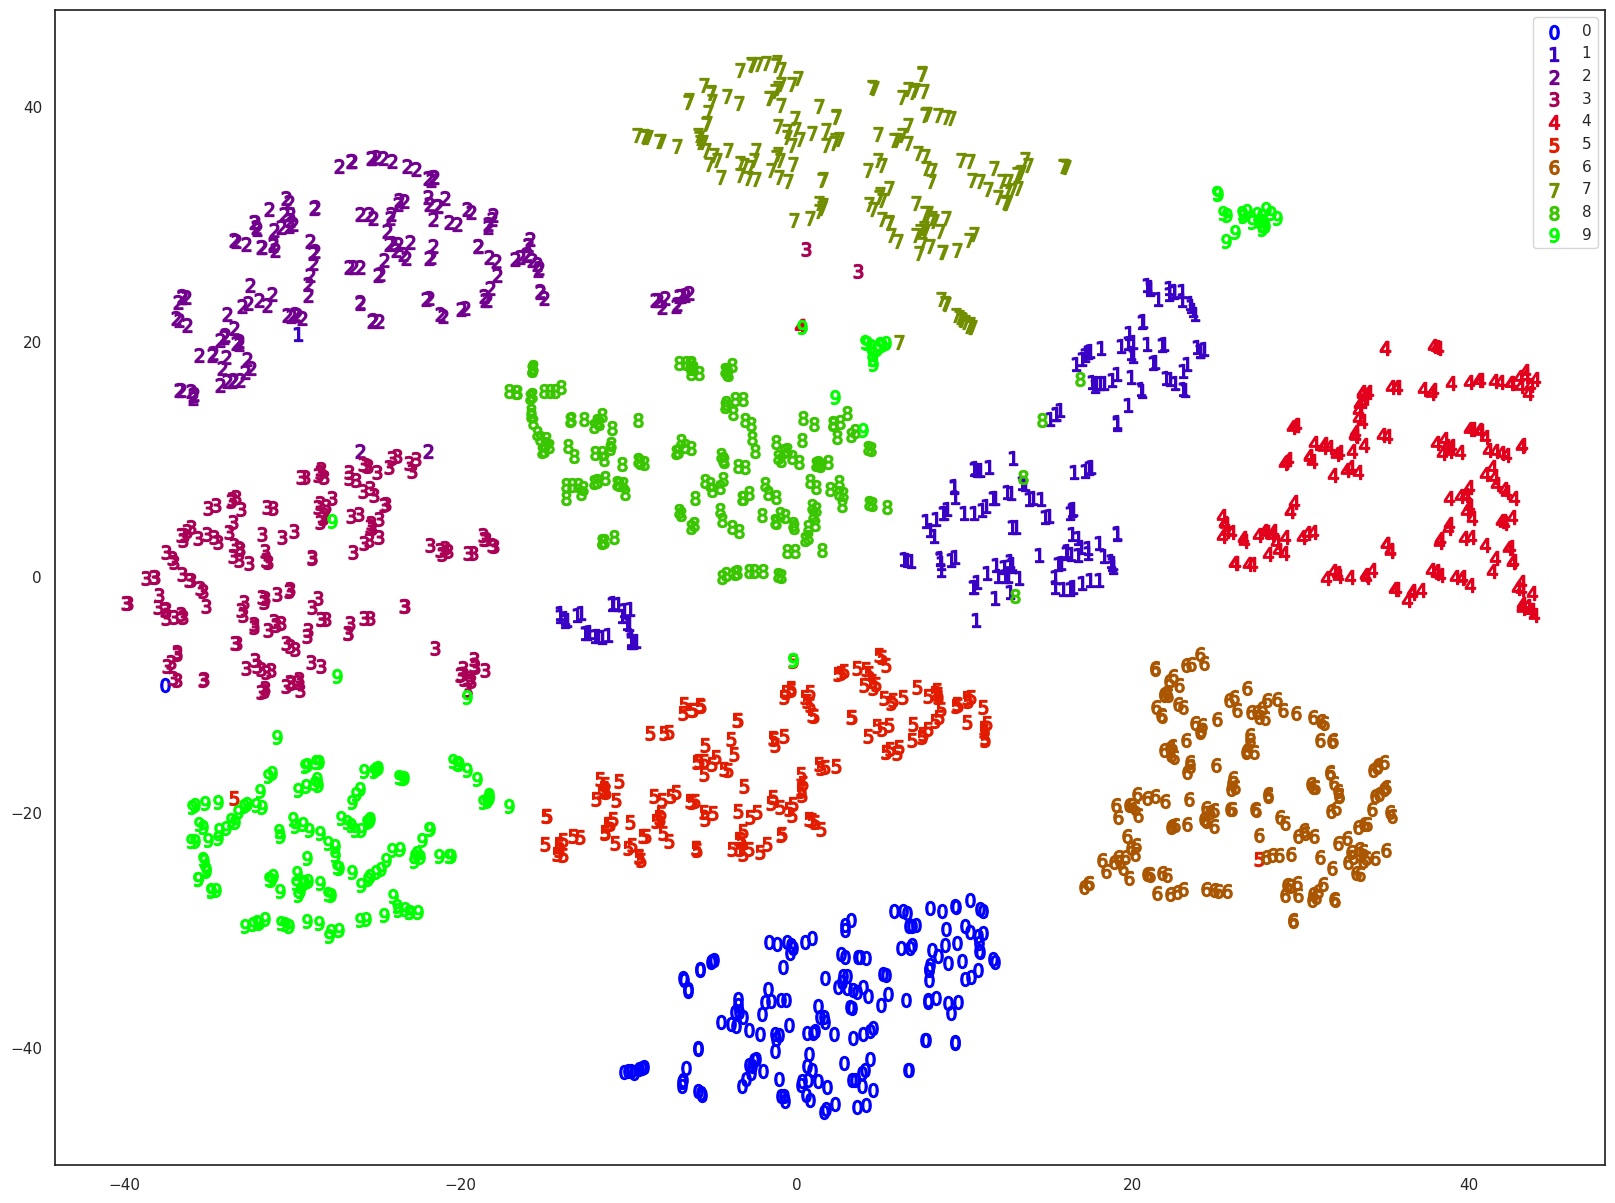

In [48]:
print('Correct labels:') # In ra dòng chữ thông báo
plt.rcParams['figure.figsize'] = (20,15) # Đặt kích thước biểu đồ lớn hơn

unique_labels = set(y) # Lấy danh sách các nhãn gốc duy nhất
n_labels = len(unique_labels) # Đếm số lượng nhãn gốc duy nhất
cmap = plt.cm.get_cmap('brg', n_labels) # Tạo color map với số lượng màu bằng số lượng nhãn gốc
for l in unique_labels: # Lặp qua từng nhãn gốc
    plt.scatter(
        e_data[y == l, 0], # Trục x cho các điểm có nhãn gốc hiện tại
        e_data[y == l, 1], # Trục y cho các điểm có nhãn gốc hiện tại
        c=[cmap(l)], # Đặt màu cho nhãn gốc (sử dụng colormap)
        marker=f'${l}$', # Đặt kiểu điểm là ký tự số của nhãn
        alpha=1, # Đặt độ trong suốt
        label=f'{l}', # Đặt nhãn cho chú giải
        s=100) # Đặt kích thước điểm
plt.legend(bbox_to_anchor=[1, 1]) # Hiển thị chú giải ở vị trí bên phải trên cùng
plt.show() # Hiển thị biểu đồ

Finally, we can prove our friend's handwriting is unreadable (even for state-of-the-art unsupervised algorithms):


In [49]:
for i, (l, t) in enumerate(zip(cluster.labels_[-3:], y[-3:])): # Lặp qua 3 nhãn dự đoán cuối cùng và 3 nhãn gốc cuối cùng (tương ứng với chữ viết tay của bạn bè)
    print('-' * 30) # In ra dòng phân cách
    print(f'Your friend\'s {i}th sample was categorized as being in cluster #{l}') # In ra nhãn cluster dự đoán cho mẫu thứ i của bạn bè
    if l == -1: # Kiểm tra nếu nhãn dự đoán là -1 (nhiễu)
        print('(IE: Noise)') # In ra thông báo đó là nhiễu
    else: # Nếu không phải nhiễu
        v, c = np.unique(y[cluster.labels_ == l], return_counts=True) # Đếm số lần xuất hiện của từng nhãn gốc trong cluster dự đoán
        mfreq = v[np.argmax(c)] # Tìm nhãn gốc phổ biến nhất trong cluster dự đoán
        ratio = c.max() / c.sum() # Tính tỷ lệ của nhãn gốc phổ biến nhất trong cluster dự đoán
        print(f'Cluster {l} is {ratio * 100:.2f}% the number {mfreq}') # In ra thông tin về nhãn gốc phổ biến nhất trong cluster dự đoán

    print(f'Your friend\'s {i}th sample is supposed to be the number {t}') # In ra nhãn gốc của mẫu thứ i của bạn bè

------------------------------
Your friend's 0th sample was categorized as being in cluster #-1
(IE: Noise)
Your friend's 0th sample is supposed to be the number 0
------------------------------
Your friend's 1th sample was categorized as being in cluster #-1
(IE: Noise)
Your friend's 1th sample is supposed to be the number 1
------------------------------
Your friend's 2th sample was categorized as being in cluster #-1
(IE: Noise)
Your friend's 2th sample is supposed to be the number 2


As you can see, all our friend's data was either categorized as noise, or put in a category where the vast majority is a different number.


# Exercises

In this section, you can practice using `DBSCAN` by applying the algorithm on different datasets.

Please run the following code to acquire the dataset for the exercises:


In [21]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
df.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


Here's what the data looks like:


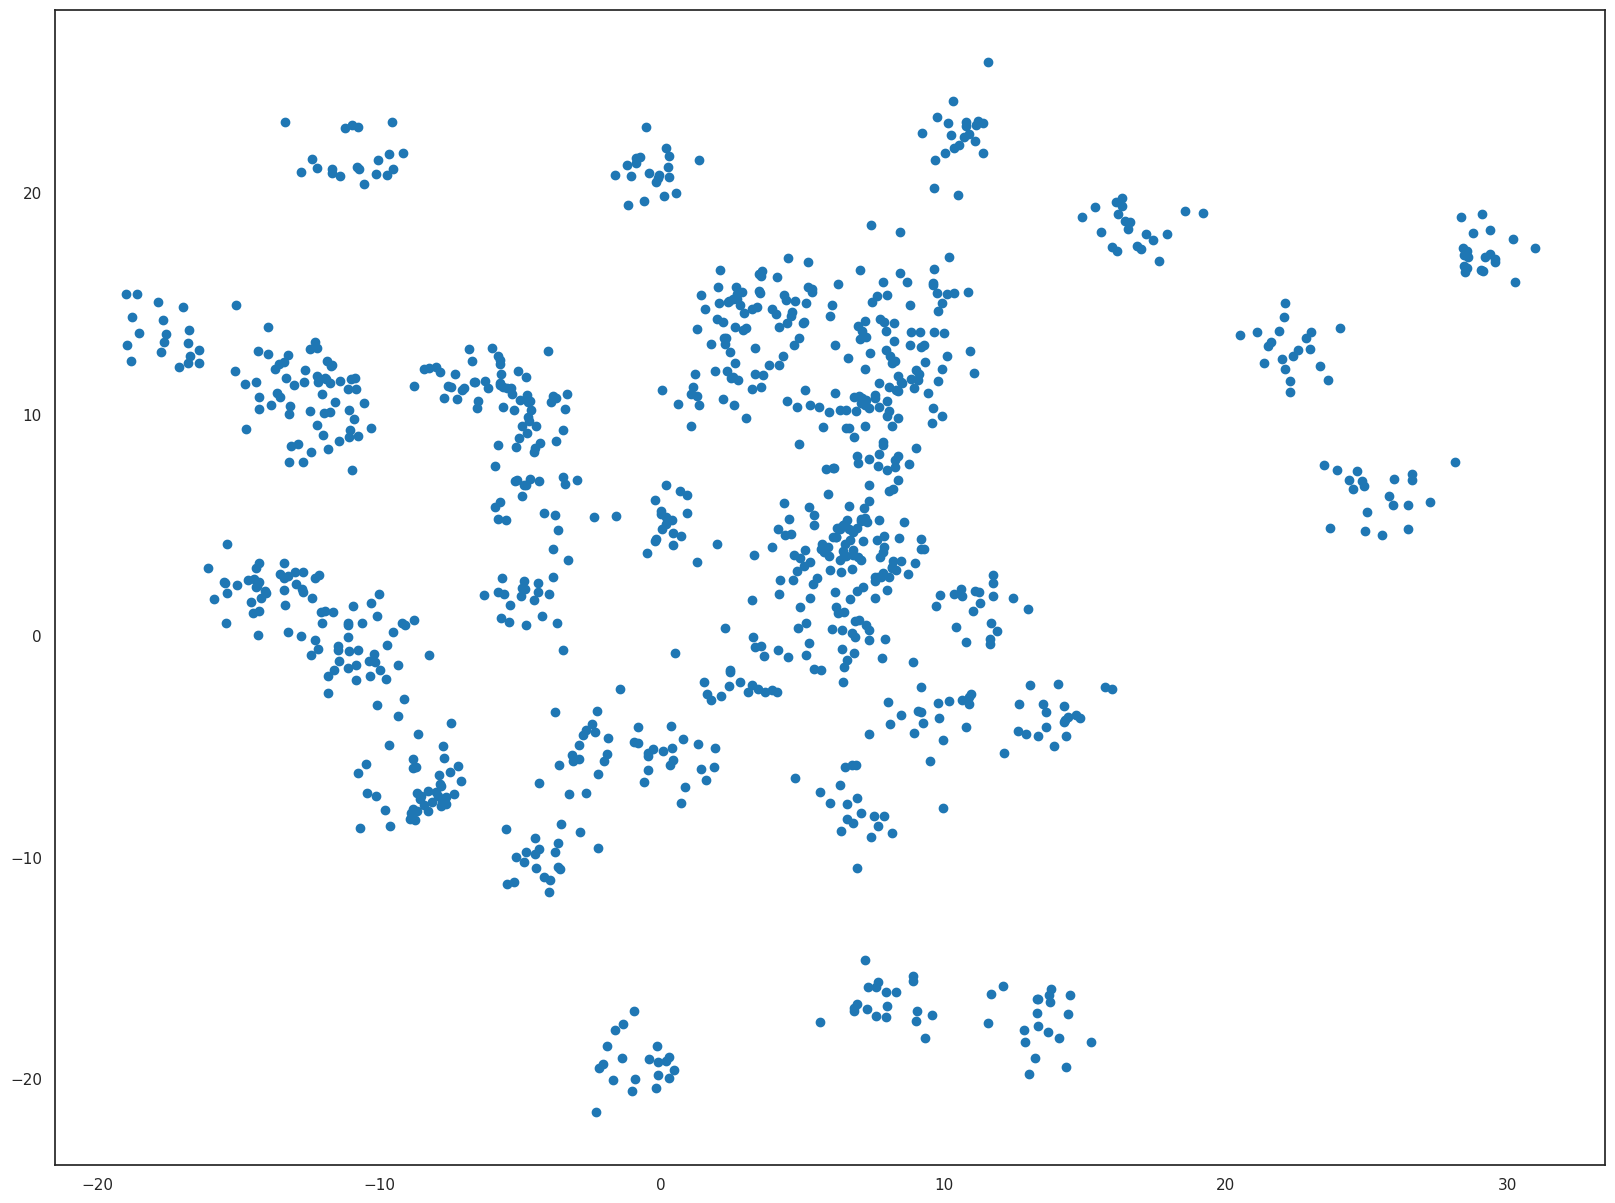

In [22]:
plt.scatter(df['x'], df['y'])
plt.show()

## Exercise 1 - Find the number of clusters

Find the number of clusters with:
   - `eps=2`
   - `min_samples=10`

(Not including noise).


In [44]:
# TODO
cluster = DBSCAN(eps=4, min_samples=4)
cluster.fit(df)
print(len(set(cluster.labels_) - {1}))


1


<details>
    <summary>Click Here For a Sample Solution</summary>
    
```python
cluster = DBSCAN(eps=4, min_samples=4)
cluster.fit(df)
print(len(set(cluster.labels_) - {1}))
```

</details>


## Exercise 2 - Find the % of data marked as noise

Using the fitted `DBSCAN` object from the previous exercise, find % of the data that was marked as noise:


In [50]:
# TODO
print(f'{100 * (cluster.labels_ == -1).sum() / len(cluster.labels_)}%')


100.0%


<details>
    <summary>Click Here For a Sample Solution</summary>
    
```python
print(f'{100 * (cluster.labels_ == -1).sum() / len(cluster.labels_)}%')
```
    
</details>


## Exercise 3 - Visualize the clustered data using matplotlib.pyplot

It's very useful to visualize your clustered data when possible (i.e., when dimension is low enough);

Using `matplotlib.pyplot`, visualize the clustered data - where each cluster has its own assigned color.


In [52]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        df['x'][cluster.labels_ == l],
        df['y'][cluster.labels_ == l],
        c=[cmap(l)],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

KeyError: 'x'

<details>
    <summary>Click Here For a Sample Solution</summary>
    
```python
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        df['x'][cluster.labels_ == l],
        df['y'][cluster.labels_ == l],
        c=[cmap(l)],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
```
    
</details>


## Authors


[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2021-12-20|0.1|Sam Prokopchuk|Complete Exercises' content|
|2022-05-20|0.2|Roxanne Li|Review and edit|
|2022-07-18|0.2|Svitlana K |Review and edit|


Copyright © 2021 IBM Corporation. All rights reserved.
